In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import scipy as sc
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


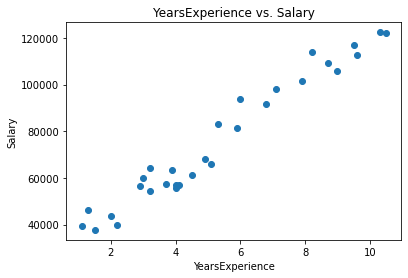

In [7]:
# Visualize data

plt.scatter(df.YearsExperience, df.Salary)
plt.title('YearsExperience vs. Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [8]:
# From scatter plot relationship between two variables does appear to be linear

<AxesSubplot:>

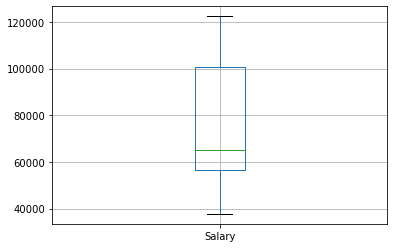

In [9]:
df.boxplot(column = ['Salary'])

In [9]:
# Perform simple linear regression

In [14]:
# Define response variable

y = df['Salary']

In [15]:
# Define explanatory variable

x = df['YearsExperience']

In [16]:
# Add constant to predictor variables

x = sm.add_constant(x)

In [17]:
# Fit linear regression model

model = sm.OLS(y, x).fit()

In [18]:
# View model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 23 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        22:22:52   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# From the model summary we can see that fitted regression equation is:
# Salary = 2.579e+04 + 9449.9623 * YearsExperience 

# Each additional year of experience is associated with an average increase in salary of 9449.9623 points.
# Intercept value of 2.579e+04 tells an average expected salary for zero year of experience.

In [20]:
# Model Summary

# pvalue is signifiacantaly less than 0.05. Hence there is statistically significant association between salary and years of experience
# 95.7% of the variation in salary can be explained by years of experience
# The F-Statistics (622.5) and pvalue (1.14e-20) states overall significance of regression model. Since pvalue is less than 0.05, model is statistically significant

In [21]:
# Residual vs Fitted Values plot

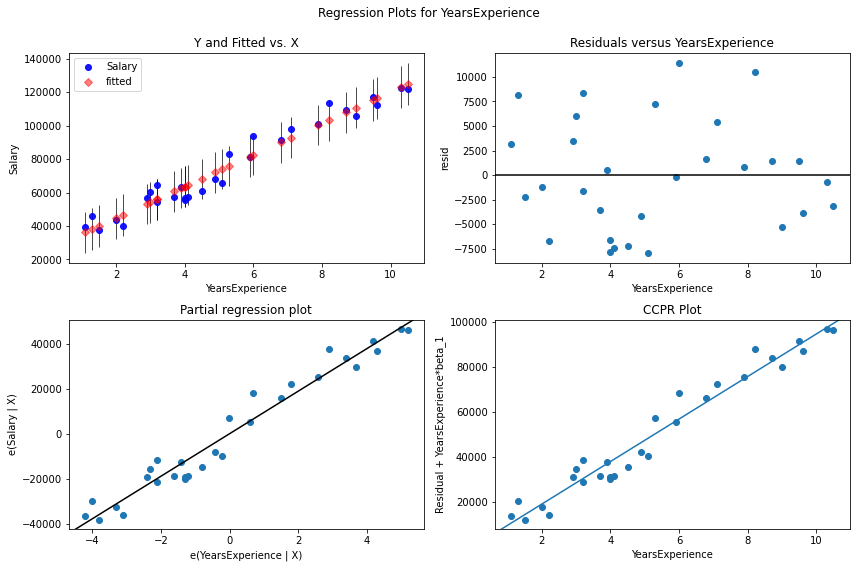

In [22]:
# Define figure size

fig = plt.figure(figsize=(12,8))

# Produce residual plots

fig = sm.graphics.plot_regress_exog(model, 'YearsExperience', fig=fig)

In [23]:
# Since the residuals appear to be randomly scattered around zero, this is an indication that heteroscedasticity is not a problem with the explanatory variable

In [24]:
# Q-Q Plot

In [25]:
# Define residuals

res = model.resid

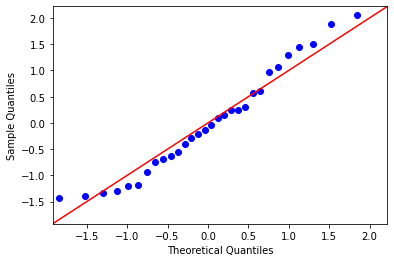

In [26]:
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

In [27]:
# The residuals stray from the 45-degree line a bit, but not enough to cause serious concern. We can assume that the normality assumption is met

# Since the residuals are normally distributed and homoscedastic, we’ve verified that the assumptions of the simple linear regression model are met. 
# Thus, the output from our model is reliable.

In [29]:
# Model Prediction

# Model prediction for years of experience 3.0

Salary = 2.579e+04 + 9449.9623 * (3) 
Salary

54139.8869